In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import mysql.connector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
remote = mysql.connector.connect(
    host = "----",
    port = "3306",
    user = "root",
    password = "----",
    database = "----"
)

sql = "select * from driver_info"

df = pd.read_sql(sql, remote)

remote.close()

/tmp/ipykernel_38938/132444352.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, remote)


In [6]:
print(df)

   season                name  height  weight  points
0    2024        Esteban Ocon     186      66      23
1    2024          Alex Albon     186      74      12
2    2024      George Russell     185      70     245
3    2024     Nico Hulkenberg     184      78      41
4    2024        Lance Stroll     182      70      24
..    ...                 ...     ...     ...     ...
75   2021      Kimi Raikkonen     175      70      10
76   2021  Antonio Giovinazzi     185      75       3
77   2021     Mick Schumacher     176      67       0
78   2021      George Russell     185      70      16
79   2021    Nicholas Latiffi     185      73       1

[80 rows x 5 columns]


In [30]:
print(df.iloc[0:9])

  season              name  height  weight  points
0   2024      Esteban Ocon     186      66      23
1   2024        Alex Albon     186      74      12
2   2024    George Russell     185      70     245
3   2024   Nico Hulkenberg     184      78      41
4   2024      Lance Stroll     182      70      24
5   2024    Max Verstappen     181      72     437
6   2024    Logan Sargeant     181      71       0
7   2024   Charles Leclerc     180      69     356
8   2024  Daniel Ricciardo     179      66      12


In [36]:
df_2024 = df[df['season'] == '2024'] 
df_2023 = df[df['season'] == '2023'] 
df_2022 = df[df['season'] == '2022'] 
df_2021 = df[df['season'] == '2021']

print(df_2021)


   season                name  height  weight  points
61   2021      Lewis Hamilton     174      73     387
62   2021     Valtteri Bottas     173      69     226
63   2021      Max Verstappen     181      72     395
64   2021        Sergio Perez     173      63     190
65   2021    Sebastian Vettel     175      62      43
66   2021        Lance Stroll     182      70      34
67   2021     Fernando Alonso     171      68      81
68   2021        Esteban Ocon     186      66      74
69   2021    Daniel Ricciardo     180      66     115
70   2021        Lando Norris     170      68     160
71   2021     Charles Leclerc     180      69     159
72   2021        Carlos Sainz     178      64     164
73   2021        Pierre Gasly     177      70     110
74   2021        Yuki Tsunoda     159      54      32
75   2021      Kimi Raikkonen     175      70      10
76   2021  Antonio Giovinazzi     185      75       3
77   2021     Mick Schumacher     176      67       0
78   2021      George Russel

In [43]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

his = make_subplots(
    rows=2, cols=2,
    subplot_titles=("2021", "2022", "2023", "2024")
)

hist_2021 = px.histogram(df_2021, x="points").data[0]
hist_2022 = px.histogram(df_2022, x="points").data[0]
hist_2023 = px.histogram(df_2023, x="points").data[0]
hist_2024 = px.histogram(df_2024, x="points").data[0]

his.add_trace(hist_2021, row=1, col=1)
his.add_trace(hist_2022, row=1, col=2)
his.add_trace(hist_2023, row=2, col=1)
his.add_trace(hist_2024, row=2, col=2)

his.update_layout(
    title="Histogram of Points by Season",
    height=800, width=800,
    showlegend=True 
)

<Axes: xlabel='weight', ylabel='points'>

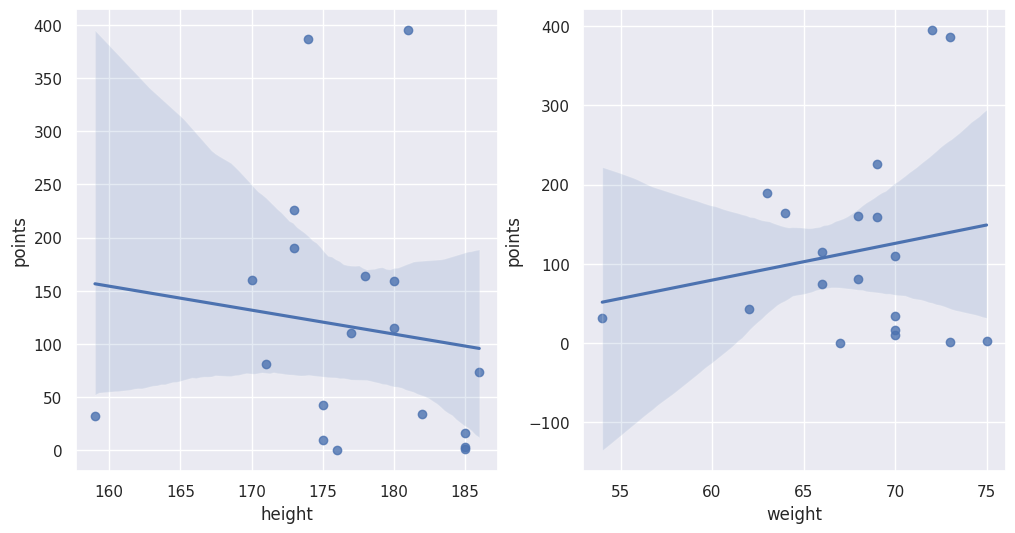

In [44]:
sns.set_style("darkgrid")
sns.set(rc={"figure.figsize":(12,6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x="height", y="points", data=df_2021, ax=ax[0])
sns.regplot(x="weight", y="points", data=df_2021, ax=ax[1])

<Axes: xlabel='weight', ylabel='points'>

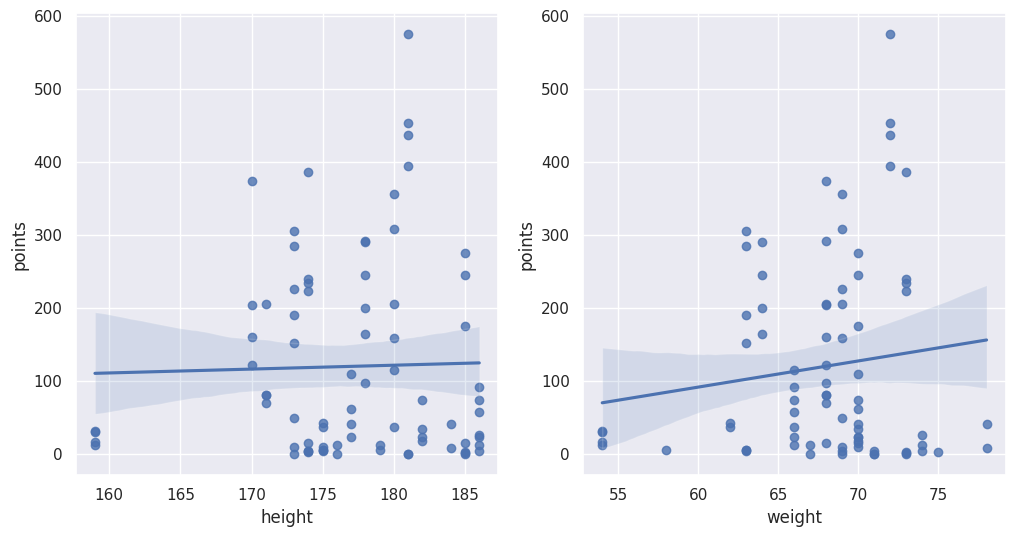

In [45]:
sns.set_style("darkgrid")
sns.set(rc={"figure.figsize":(12,6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x="height", y="points", data=df, ax=ax[0])
sns.regplot(x="weight", y="points", data=df, ax=ax[1])

test for 2021

In [49]:
X = df_2021.drop("points", axis=1)
X = df_2021.drop("season", axis=1)
X = df_2021.drop("name", axis=1)
y = df_2021["points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [50]:
reg_2021 = LinearRegression()
reg_2021.fit(X_train, y_train)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error
import numpy as np

pred_tr_2021 = reg_2021.predict(X_train)
pred_test_2021 = reg_2021.predict(X_test)

rmse_tr_2021 = np.sqrt(mean_squared_error(y_train, pred_tr_2021))
rmse_test_2021 = np.sqrt(mean_squared_error(y_test, pred_test_2021))

print("RMSE of Train Data:", rmse_tr_2021)
print("RMSE of Test Data:", rmse_test_2021)

RMSE of Train Data: 5.1007554506700253e-14
RMSE of Test Data: 3.241547046942845e-14


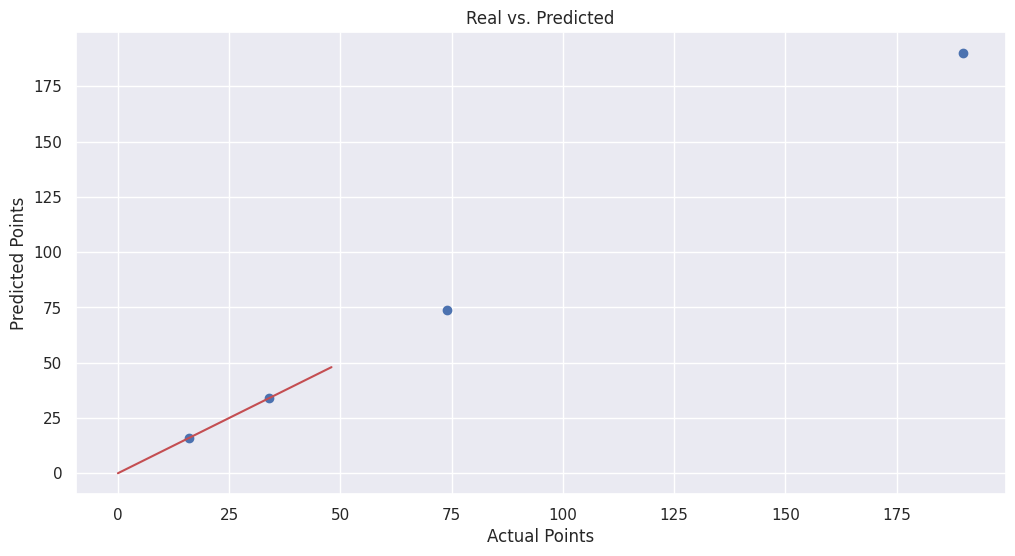

In [52]:
plt.scatter(y_test, pred_test_2021)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Real vs. Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()

In [53]:
X = df.drop("points", axis=1)
X = df.drop("season", axis=1)
X = df.drop("name", axis=1)
y = df["points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [56]:
reg_total = LinearRegression()
reg_total.fit(X_train, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np

pred_tr_total = reg_total.predict(X_train)
pred_test_total = reg_total.predict(X_test)

rmse_tr_total = np.sqrt(mean_squared_error(y_train, pred_tr_total))
rmse_test_total = np.sqrt(mean_squared_error(y_test, pred_test_total))

print("RMSE of Train Data:", rmse_tr_total)
print("RMSE of Test Data:", rmse_test_total)

RMSE of Train Data: 3.59152976135572e-14
RMSE of Test Data: 2.5755242704166584e-14


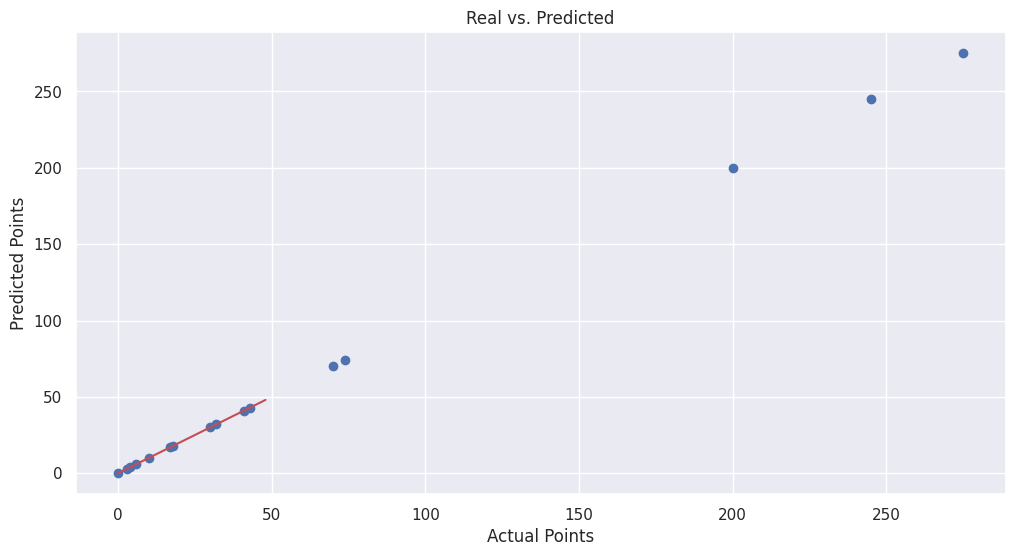

In [59]:
plt.scatter(y_test, pred_test_total)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Real vs. Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()